# 5.1 Modeling - Logistic Regression Scratch & Time Execuation 

This notebook focuses on building and evaluating models for sentiment analysis using Logistic Regression and Lexicon Based. The process includes loading the preprocessed data, splitting it into training and test sets, and vectorizing the text data using TF-IDF. We then train a logistic regression model on the training data and evaluate its performance using various metrics. The notebook concludes with saving the trained model, making it ready for deployment in future applications.

In [28]:
import re
import time
import os
import pandas as pd
import numpy as np
import datetime as dt
import psutil
import string
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
import plotly.express as px
import plotly.graph_objects as go
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, classification_report
from wordcloud import WordCloud
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [29]:
# from google.colab import drive
# drive.mount('/content/drive')

## Data

In [30]:
# Load dataframe
df = pd.read_csv('preprocessed_final.csv')
df

,created_at,Komentar,Sentiment,Score,month_year,clean_text,final_text,token,stop_text,stem_text
0,2023-03-08 04:10:06+00:00,"@ikanmokpoo mjb, mau transaksi apa Kak? Aku tr...",positive,5.016.244.649.887.080,2023-03,mjb transaksi kak transaksi bayar pake qris td...,mjb transaksi kak transaksi bayar pakai qris t...,"['mjb', 'transaksi', 'kak', 'transaksi', 'baya...","['transaksi', 'transaksi', 'bayar', 'qris', 'a...",transaksi transaksi bayar qris aman lancar jaya
1,2023-03-05 10:48:34+00:00,@BNICustomerCare ini kenapa dari dulu setiap m...,negative,989.467.442.035.675,2023-03,transaksi qris via bni ga ya min scan barcode ...,transaksi qris melalui bni tidak ya minimal sc...,"['transaksi', 'qris', 'melalui', 'bni', 'tidak...","['transaksi', 'qris', 'minimal', 'scan', 'barc...",transaksi qris minimal scan barcode otomatis c...
2,2023-03-17 04:21:57+00:00,"@tanyakanrl Keuntungannya praktis, tinggal swi...",positive,8.306.553.959.846.490,2023-03,keuntunganya praktis tingal swipe up homescren...,keuntunganya praktis tinggal swipe up homescre...,"['keuntunganya', 'praktis', 'tinggal', 'swipe'...","['keuntunganya', 'praktis', 'tinggal', 'swipe'...",keuntunganya praktis tinggal swipe homescrenlo...
3,2023-03-03 16:20:59+00:00,"@leeehovo @discountfess mau tanya kak, di pert...",neutral,9.959.661.960.601.800,2023-03,kak pertamina bayar mengunakan qris nga,kak pertamina bayar mengunakan qris tidak,"['kak', 'pertamina', 'bayar', 'mengunakan', 'q...","['pertamina', 'bayar', 'mengunakan', 'qris']",pertamina bayar mengunakan qris
4,2023-08-21 11:39:04+00:00,Udah 4x gw transaksi di alfa bahkan alfa yg ad...,negative,996.809.422.969.818,2023-08,udah gw transaksi alfa alfa yg beda kota gagal...,sudah saya transaksi alfa alfa yang beda kota ...,"['sudah', 'saya', 'transaksi', 'alfa', 'alfa',...","['transaksi', 'alfa', 'alfa', 'beda', 'kota', ...",transaksi alfa alfa beda kota gagal ros qris m...
...,...,...,...,...,...,...,...,...,...,...
7709,2024-06-24 04:55:11+00:00,haii haii kyu ada saldo receh nominal rahasia ...,neutral,9.753.036.499.023.430,2024-06,hai kyu saldo receh nominal rahasia ba qris ru...,hai ada saldo receh nominal rahasia akun bisni...,"['hai', 'ada', 'saldo', 'receh', 'nominal', 'r...","['nominal', 'rahasia', 'akun', 'bisnis', 'qris...",nominal rahasia akun bisnis qris rulesnya twet...
7710,2024-06-24 06:10:37+00:00,Banyak orang gatau kalau nyari duit itu segamp...,neutral,8.691.744.804.382.320,2024-06,orang gatau nyari duit segampang main slot gac...,orang tidak tahu mencari uang segampang main s...,"['orang', 'tidak', 'tahu', 'mencari', 'uang', ...","['orang', 'mencari', 'uang', 'segampang', 'mai...",orang cari uang gampang main gacor paris modal...
7711,2024-06-24 06:23:05+00:00,Di aku ready nih kak! Murce murce all e-wallet...,neutral,9.926.472.902.297.970,2024-06,ready nih kak murce al ewalet qris dm or wa,siap ini kak murah al ewalet qris direct messa...,"['siap', 'ini', 'kak', 'murah', 'al', 'ewalet'...","['murah', 'al', 'ewalet', 'qris', 'direct', 'm...",murah al ewalet qris direct message
7712,2024-06-24 07:09:20+00:00,mau netflix 1 bulan yg bs qris #zonauang,neutral,99.673.330.783.844,2024-06,netflix yg bs qris,netflix yang bisa qris,"['netflix', 'yang', 'bisa', 'qris']","['netflix', 'qris']",netflix qris


In [31]:
data = df[['stem_text', 'Sentiment']]

In [32]:
data

,stem_text,Sentiment
0,transaksi transaksi bayar qris aman lancar jaya,positive
1,transaksi qris minimal scan barcode otomatis c...,negative
2,keuntunganya praktis tinggal swipe homescrenlo...,positive
3,pertamina bayar mengunakan qris,neutral
4,transaksi alfa alfa beda kota gagal ros qris m...,negative
...,...,...
7709,nominal rahasia akun bisnis qris rulesnya twet...,neutral
7710,orang cari uang gampang main gacor paris modal...,neutral
7711,murah al ewalet qris direct message,neutral
7712,netflix qris,neutral


In [33]:
data['Sentiment'].value_counts()

neutral     5912
negative    1031
positive     771
Name: Sentiment, dtype: int64

In [34]:
data['Sentiment'].fillna(0, inplace=True)

C:\Users\Nab\AppData\Local\Temp\ipykernel_10720\2133464409.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sentiment'].fillna(0, inplace=True)


## Changing sentiment values into numbers

In [35]:
data['Sentiment'] = data['Sentiment'].replace({'positive': 0, 'neutral': 1, 'negative': 2}).astype(int)
# Use .loc to modify the DataFrame
data.loc[:, 'Sentiment'] = data['Sentiment'].replace({'positive': 0, 'neutral': 1, 'negative': 2}).astype(int)

C:\Users\Nab\AppData\Local\Temp\ipykernel_10720\3657538082.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sentiment'] = data['Sentiment'].replace({'positive': 0, 'neutral': 1, 'negative': 2}).astype(int)
C:\Users\Nab\AppData\Local\Temp\ipykernel_10720\3657538082.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, 'Sentiment'] = data['Sentiment'].replace({'positive': 0, 'neutral': 1, 'negative': 2}).astype(int)


In [36]:
data['stem_text'] = data['stem_text'].fillna('')

C:\Users\Nab\AppData\Local\Temp\ipykernel_10720\2477820184.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['stem_text'] = data['stem_text'].fillna('')


## Split the text into X and y

In [37]:
X = data['stem_text']
y = data['Sentiment']

In [38]:
X

0         transaksi transaksi bayar qris aman lancar jaya
1       transaksi qris minimal scan barcode otomatis c...
2       keuntunganya praktis tinggal swipe homescrenlo...
3                         pertamina bayar mengunakan qris
4       transaksi alfa alfa beda kota gagal ros qris m...
                              ...                        
7709    nominal rahasia akun bisnis qris rulesnya twet...
7710    orang cari uang gampang main gacor paris modal...
7711                  murah al ewalet qris direct message
7712                                         netflix qris
7713                akun bisnis qris pined mutualan cepat
Name: stem_text, Length: 7714, dtype: object

# Modeling Logistic Regression

In [39]:
class LogisticRegressionOvR:
    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.models = []
        self.scaler = StandardScaler(with_mean=False)

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def compute_loss(self, y_true, y_pred, class_weights):
        epsilon = 1e-9
        y1 = y_true * np.log(y_pred + epsilon)
        y2 = (1 - y_true) * np.log(1 - y_pred + epsilon)
        return -np.mean(class_weights * (y1 + y2))

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Normalize the data
        X = self.scaler.fit_transform(X).toarray()  # Convert to dense array

        # Train a separate model for each class (One-vs-Rest)
        unique_classes = np.unique(y)
        for cls in unique_classes:
            y_binary = np.where(y == cls, 1, 0)  # Create binary labels for the current class

            # Initialize parameters for the current class
            weights = np.random.randn(n_features) * 0.01
            bias = 0

            # Calculate class weights
            class_counts = np.bincount(y_binary)
            total_samples = len(y_binary)
            class_weights = {0: total_samples / class_counts[0], 1: total_samples / class_counts[1]}

            # Gradient descent for the current class
            for _ in range(self.n_iters):
                z = X.dot(weights) + bias
                A = self._sigmoid(z)
                weighted_loss = self.compute_loss(y_binary, A, np.array([class_weights[label] for label in y_binary]))
                dz = (A - y_binary) * np.array([class_weights[label] for label in y_binary])
                dw = (1 / n_samples) * X.T.dot(dz)
                db = (1 / n_samples) * np.sum(dz)
                weights -= self.lr * dw
                bias -= self.lr * db

            # Store the trained weights and bias for the current class
            self.models.append((weights, bias))

    def predict(self, X):
        # Normalize the data using the fitted scaler
        X = self.scaler.transform(X).toarray()  # Convert to dense array

        # Compute predictions for each class and choose the class with the highest probability
        predictions = []
        for weights, bias in self.models:
            z = X.dot(weights) + bias
            A = self._sigmoid(z)
            predictions.append(A)

        predictions = np.array(predictions)
        y_predicted_cls = np.argmax(predictions, axis=0)
        return y_predicted_cls

In [40]:
#To Calculate Memory Usage
def measure_resources():
    process = psutil.Process(os.getpid())
    cpu_usage = process.cpu_percent(interval=1)
    memory_usage = process.memory_info().rss / (1024 * 1024)  # Convert to MB
    return cpu_usage, memory_usage

In [41]:
# Convert the text data to TF-IDF features
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(X)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.1, random_state=42)

start_time = time.time()

# Initialize and train the model
model = LogisticRegressionOvR(learning_rate=0.01, n_iters=500)

# Measure resources before training
cpu_before, memory_before = measure_resources()

model.fit(X_train, y_train)

# End time
end_time = time.time()

# Measure resources after training
cpu_after, memory_after = measure_resources()

# Calculate resource usage
training_cpu_usage = cpu_after - cpu_before
training_memory_usage = memory_after - memory_before
training_time = end_time - start_time

print(f"Waktu eksekusi training: {training_time} detik")
print(f"Penggunaan CPU untuk training: {training_cpu_usage} %")
print(f"Penggunaan Memory untuk training: {training_memory_usage} MB")

Waktu eksekusi training: 77.48645496368408 detik
Penggunaan CPU untuk training: 0.0 %
Penggunaan Memory untuk training: 2.2109375 MB


In [42]:
# Print classification report
predictions=model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.46      0.61      0.52        79
           1       0.89      0.84      0.87       597
           2       0.49      0.54      0.51        96

    accuracy                           0.78       772
   macro avg       0.61      0.66      0.63       772
weighted avg       0.80      0.78      0.79       772



Confusion Matrix:
[[ 48  26   5]
 [ 47 501  49]
 [ 10  34  52]]


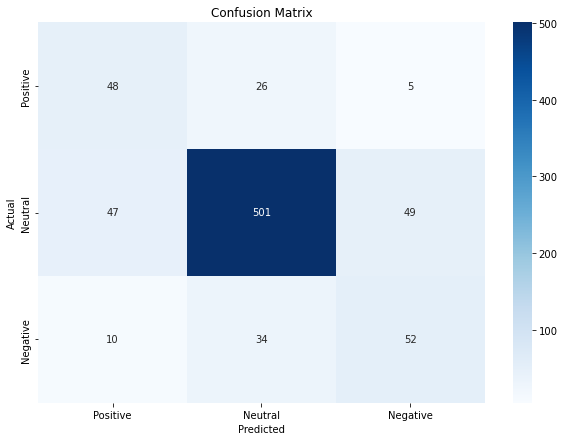

In [43]:
cm = confusion_matrix(y_test, predictions)
# Print results
print("Confusion Matrix:")
print(cm)

# Visualize confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Neutral', 'Negative'], yticklabels=['Positive', 'Neutral', 'Negative'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Parameter grids to try
learning_rates = [0.001, 0.01, 0.1]
iterations = [500, 1000, 2000]

best_accuracy = 0
best_params = {}

for lr in learning_rates:
    for n_iter in iterations:
        model = LogisticRegressionOvR(learning_rate=lr, n_iters=n_iter)
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        accuracy = np.mean(predictions == y_test) * 100
        print(f"Learning Rate: {lr}, Iterations: {n_iter}, Accuracy: {accuracy}%")
        
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params = {'learning_rate': lr, 'n_iters': n_iter}

print(f"\nBest Parameters: {best_params}")
print(f"Best Accuracy: {best_accuracy}%")

Learning Rate: 0.001, Iterations: 500, Accuracy: 70.07772020725389%
Learning Rate: 0.001, Iterations: 1000, Accuracy: 75.0%


In [ ]:
# Start time
start_time = time.time()

# Predicting the data
predictions = model.predict(X_test)
accuracy = np.mean(predictions == y_test) * 100

print(f"Predictions: {predictions}")
print(f"Accuracy: {accuracy:.2f}%")

# End time
end_time = time.time()

# Calculate execution time
training_time = end_time - start_time
print(f"Waktu eksekusi prediksi: {training_time} detik")

# Lexicon Based

In [ ]:
# Load lexicon data
def load_lexicon(filepath):
    lexicon = {}
    with open(filepath, 'r') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        for row in reader:
            lexicon[row[0]] = int(row[1])
    return lexicon

In [ ]:
import csv
lexicon_positive = load_lexicon('lexicon_positive_ver1.csv')
lexicon_negative = load_lexicon('lexicon_negative_ver1.csv')

In [ ]:
def sentiment_analysis_lexicon_indonesia(text):
  score = 0
  for word_pos in text:
    if (word_pos in lexicon_positive):
      score = score + lexicon_positive[word_pos]
  for word_neg in text:
    if (word_neg in lexicon_negative):
      score = score + lexicon_negative[word_neg]
  polarity=''
  if (score > 0):
    polarity = 'positive'
  elif (score < 0):
    polarity = 'negative'
  else:
    polarity = 'neutral'

  return score, polarity

In [ ]:
# Measure time and resources for Lexicon-based method
start_time = time.time()
cpu_before, memory_before = measure_resources()
df['prepos_text'] = df['stem_text'].str.split()
df['prepos_text'] = df['prepos_text'].fillna('')
results = df['prepos_text'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
df['polarity_score'] = results[0]
df['polarity'] = results[1]
end_time = time.time()
cpu_after, memory_after = measure_resources()
lexicon_time = end_time - start_time
lexicon_cpu_usage = cpu_after - cpu_before
lexicon_memory_usage = memory_after - memory_before

print(f"Waktu eksekusi Lexicon-based: {lexicon_time} detik")
print(f"Penggunaan CPU untuk Lexicon-based: {lexicon_cpu_usage} %")
print(f"Penggunaan Memory untuk Lexicon-based: {lexicon_memory_usage} MB")
print(df['polarity'].value_counts())